# DATA 601 Project
    Domestic Movie Analysis from 1970-2023 – Have Domestic Films Gotten Worse?
    
#### By:
* Brian Englum
* Tyler Snow
* Joel Wheatley
* Kumar Pasupuleti

> **Purpose:**
> * Many movie fans and film critics believe that U.S. domestic movies have deteriorated in quality over time. Classic blockbusters like "The Godfather," "The Terminator," the Star Wars Episodes IV-VI seem to be a thing of the past. Studios and producers appear to be more interested in making animations; plot-absent, visually entertaining films; and never-ending sequels than making truly original, creative films.
> * Although viewers and critics may feel this way, little research has been done on the topic.
> * The goal of this project is to use statistical analysis and data science tools to explore this topic and come to a conclusion, one way or another.  

## First Steps

In [797]:
# Imports
import pandas as pd
import csv
import numpy as np
import plotly.express as px
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [798]:
# Prevent warning messages from appearing.
import warnings
warnings.filterwarnings("ignore")

In [799]:
# Create initial DataFrame from movie_data.csv
df = pd.read_csv('https://raw.githubusercontent.com/tsnow2010/DATA601/refs/heads/main/DATA601_Project1/data/movie_data.csv')
print(f'This dataset has {df.shape[0]} movies.' )
df.sample(1)

This dataset has 51406 movies.


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
10698,Deliver Us from Evil,2009.0,Thriller,6.5,80,NaN,5.7,"2,142",5 wins & 11 nominations,NaN,movie,Ole Bornedal,"Denmark, Sweden, Norway"


## I: Data Cleaning

### Step 1) Restrict years used from 1970 to 2023.  Extreme outliers or no data exists for movies outside these ranges.

In [802]:
df = df[(df['Year'] >= 1970.0) & (df['Year'] <= 2023.0)]

### Step 2) Remove '$' and ',' char's from the GDBOS column values and turns them into <<float>>.

In [804]:
df['Gross Domestic Box Office Sales ($)'] = df['Gross Domestic Box Office Sales ($)'].astype(str).apply(lambda x: ''.join([char for char in x if char not in ['$',',']])).astype(float)
df.sample(1)

,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin
40180,The Good Guy,2009.0,"Comedy, Romance",5.7,33,47.0,5.566,"9,839",NaN,100688.0,movie,Julio DePietro,United States


### Step 3) Create a DataFrame (df_movie_ratings) that allows data analysis of movie rating metrics.
- Change rating system values from str to float.
- Drop NaN values.

In [806]:
# Changes rating system values (EXCEPT RT) from str to float.

df['IMDB'] = df['IMDB'].astype(float)
df['Metacritic'] = df['Metacritic'].astype(float)
df['TMDB'] = df['TMDB'].astype(float)
df['Rotten_tom'] = pd.to_numeric(df['Rotten Tomatoes'], errors='coerce')
df['IMDB_votes'] = pd.to_numeric(df['# of IMDB Votes'].str.replace(',', ''), errors='coerce')


# Assigns 'None' to invalid RT ratings, i.e. '31/10' and etc, and removes them in df_movie_ratings.

def clean_rotten_tom(rtg):
    if type(rtg) is str:
        if '/' in rtg:
            return None
        else:
            return rtg
    else:
        return rtg

print("Number of movies BEFORE removing 'bad' RT ratings:", df.shape[0])

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(clean_rotten_tom)
df_RT = df.dropna(subset='Rotten Tomatoes')

print("Number of movies AFTER removing 'bad' RT ratings:", df_RT.shape[0])

df_RT['Rotten Tomatoes'] = df_RT['Rotten Tomatoes'].astype(float)

df = df.reset_index(drop=True)

df.sample(1)

Number of movies BEFORE removing 'bad' RT ratings: 42860
Number of movies AFTER removing 'bad' RT ratings: 18422


,Title,Year,Genre(s),IMDB,Rotten Tomatoes,Metacritic,TMDB,# of IMDB Votes,# of Awards,Gross Domestic Box Office Sales ($),Media,Directors,Origin,Rotten_tom,IMDB_votes
12232,For Love of the Game,1999.0,"Drama, Romance, Sport",6.6,47,43.0,6.5,"38,132",7 nominations,35188640.0,movie,Sam Raimi,United States,47.0,38132.0


# UPLOAD

### Step 4) Remove international movies.

In [809]:
def check_foreign(origin):
  try:
    if ('United States' in origin) or ('USA' in origin):
      return True
    else:
      return False
  except:
    return False

print("Number of movies BEFORE removing international movies or those with NaN values:", df.shape[0])

# Drop movies with NaN in "Origin"
df.dropna(subset='Origin')

# Check international status of movies.
df['Domestic?'] = df['Origin'].apply(check_foreign)

# Remove movies without "United States" in 'Origin'
df = df[df['Domestic?'] == True]

print("Number of movies AFTER removing international movies or those with NaN values:", df.shape[0])



Number of movies BEFORE removing international movies or those with NaN values: 42860
Number of movies AFTER removing international movies or those with NaN values: 21692


      Year  count
53  1970.0    137
52  1971.0    154
51  1972.0    168
41  1973.0    201
42  1974.0    192
48  1975.0    173
43  1976.0    190
50  1977.0    169
47  1978.0    174
49  1979.0    172
40  1980.0    213
45  1981.0    180
44  1982.0    181
46  1983.0    174
39  1984.0    216
38  1985.0    233
37  1986.0    261
32  1987.0    294
27  1988.0    318
31  1989.0    296
35  1990.0    284
34  1991.0    287
36  1992.0    279
28  1993.0    315
26  1994.0    342
22  1995.0    376
20  1996.0    395
19  1997.0    406
17  1998.0    431
18  1999.0    417
15  2000.0    453
16  2001.0    447
12  2002.0    498
14  2003.0    461
13  2004.0    492
11  2005.0    606
10  2006.0    646
8   2007.0    697
7   2008.0    769
6   2009.0    782
9   2010.0    680
4   2011.0    814
3   2012.0    835
1   2013.0    908
0   2014.0    952
2   2015.0    880
5   2016.0    805
21  2017.0    391
29  2018.0    298
33  2019.0    290
30  2020.0    298
24  2021.0    355
23  2022.0    356
25  2023.0    351


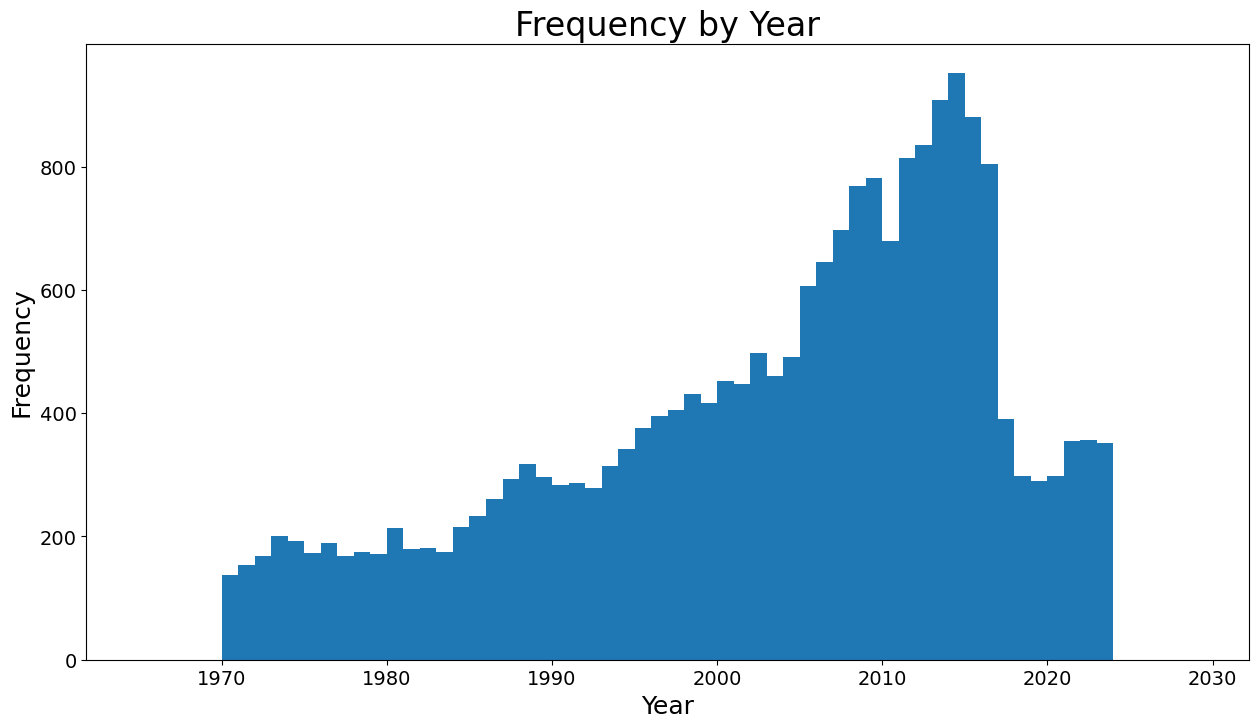

In [810]:
#Evaluate Year
print(df['Year'].value_counts().reset_index().sort_values('Year'))

#Histogram of year
plt.figure(figsize=(15,8))
plt.hist(df.Year, bins=np.arange(1965, 2030))
plt.title('Frequency by Year', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.savefig('histo_year.jpg', format='jpg', dpi=300)

In [811]:
#Convert year from float to int (remove NaN, then replace NaN)
df['Year_int'] = df['Year'].astype(str)
df['Year_int'] = df['Year_int'].str.slice(0, -2)
df['Year_int'][df['Year'].isnull()] = np.nan

df['filmyear'] = df['Title'] + '_' + df['Year_int']

In [812]:
#Combine all the genres listed into a giant list then use set to get rid of all duplicates
df['Genre(s)'][pd.isna(df['Genre(s)'])] = ''
Genres = list(df['Genre(s)'])
Genres2 = []
for i in range(len(Genres)):
    Genres2.append(re.split(', ', Genres[i]))
flat_genres = [
    genres1
    for genres2 in Genres2
    for genres1 in genres2
]
set_genres = set(flat_genres)
all_genres = sorted(list(set_genres))
all_genres.remove('')

## Special Note:
- The main API used in this project, OMDB API, returns invalid RT rating for over **5000 movies** (see above for reference).  
- As a result, in order to effectively remove movies without RT but not remove those movies possessing ratings from the other metrics, RT will be analyzed separately in some data visualizations.

## II: Data Visualization

### A. Movie Ratings as a Function of Time (in years)

#### Step 1) Group movie data by year and then use aggregation to find averages per metric per year.

In [817]:
# Group by year and find average ratings per metric per year.

df_groupby_year_no_RT = df.groupby("Year").aggregate({
    'IMDB':'mean',
    'Metacritic':'mean',
    'TMDB':'mean'})

df_groupby_year_no_RT = df_groupby_year_no_RT.reset_index()

df_groupby_year_with_RT = df_RT.groupby("Year").aggregate({
    'Rotten Tomatoes': 'mean',
    })

df_groupby_year_with_RT = df_groupby_year_with_RT.reset_index()

#### Step 2) Plot (4) line graphs containing movie ratings per metric as a function of time, in years.

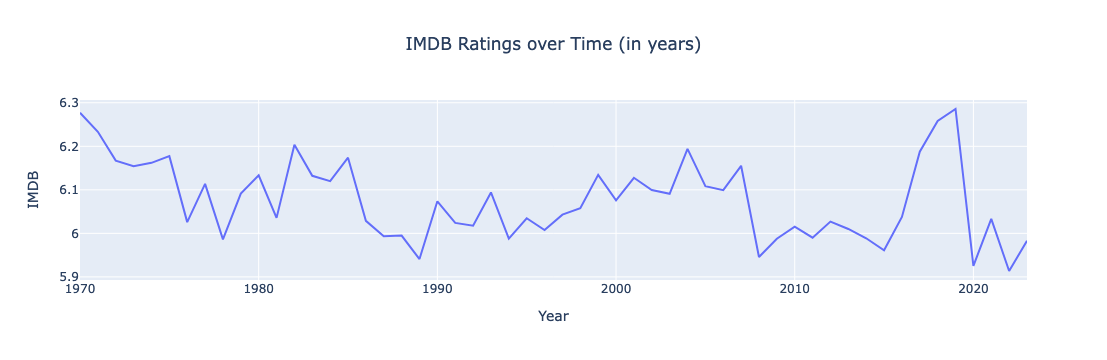

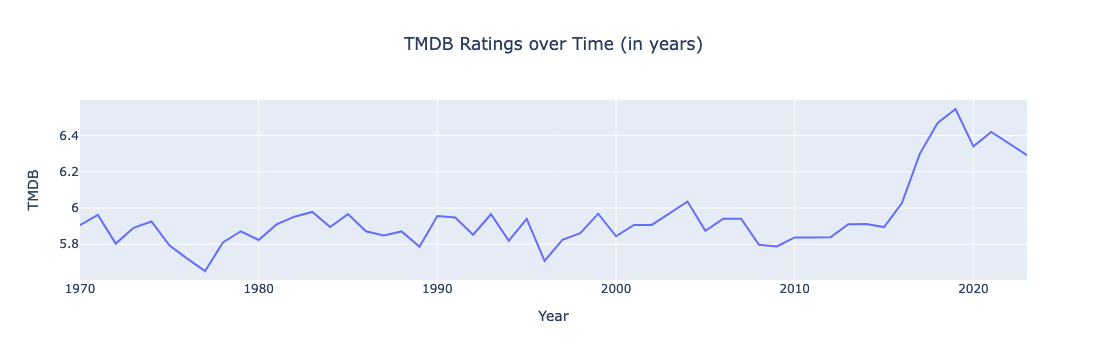

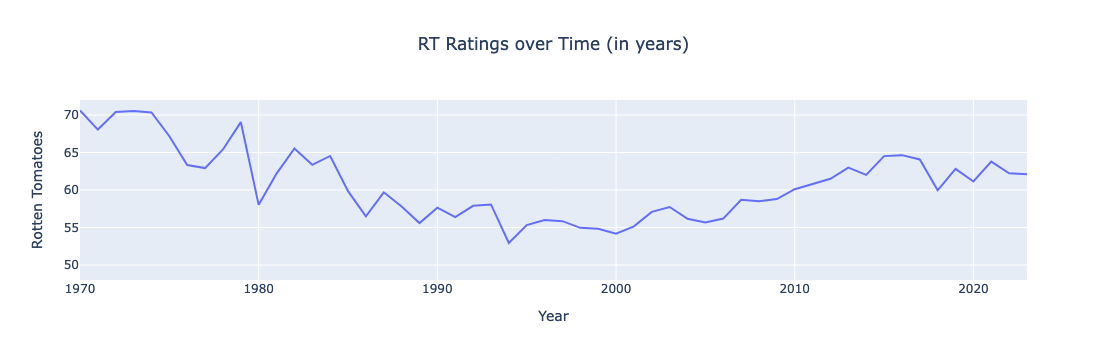

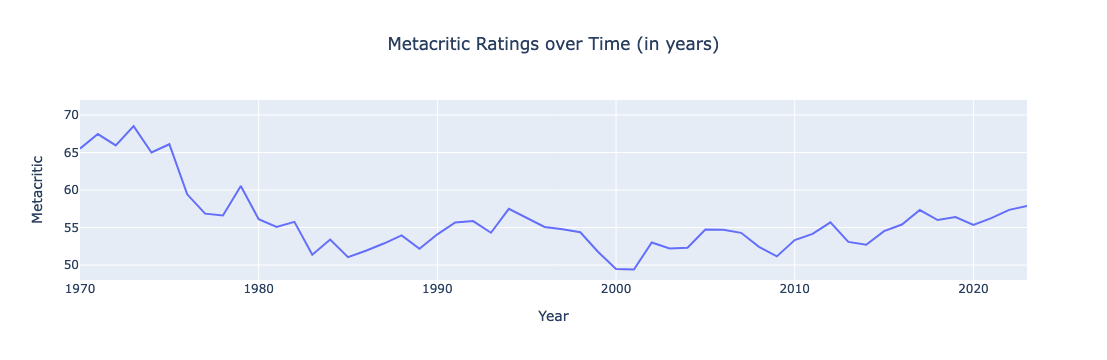

In [819]:
# Plot movie ratings per metric per year.

fig1 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'IMDB',
    title='IMDB Ratings over Time (in years)'
)

fig2 = px.line(
    df_groupby_year_with_RT,
    x = 'Year',
    y = 'Rotten Tomatoes',
    title='RT Ratings over Time (in years)'
)

fig3 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'Metacritic',
    title='Metacritic Ratings over Time (in years)'
)

fig4 = px.line(
    df_groupby_year_no_RT,
    x = 'Year',
    y = 'TMDB',
    title='TMDB Ratings over Time (in years)'
)

fig1.update_layout(title_x = .5)
fig2.update_layout(title_x = .5)
fig3.update_layout(title_x = .5)
fig4.update_layout(title_x = .5)

# Update axes
# fig1.update_xaxes(range=[1970, 2023])
# fig1.update_yaxes(range=[5.5, 6.4])

fig2.update_xaxes(range=[1970, 2023])
fig2.update_yaxes(range=[48, 72])  

fig3.update_xaxes(range=[1970, 2023])
fig3.update_yaxes(range=[48, 72]) 

fig4.update_xaxes(range=[1970, 2023])
fig.update_yaxes(range=[5.5, 6.4]) 



# Plot graphs


fig1.show()
fig4.show()
fig2.show()
fig3.show()



### B. Movie Ratings **(by genre)** as a Function of Time (in years)

#### Step 1) Drop all movies that have NaN in 'Genre(s)' column.

In [822]:
df_genres = df.copy()
print("Number of movies BEFORE removing those without genres:", df_genres['Genre(s)'].shape[0])
df_genres = df_genres.dropna(subset='Genre(s)')
print("Number of movies AFTER removing those without genres:", df_genres['Genre(s)'].shape[0])

df_genres_RT = df_RT.copy()
df_genres_RT = df_genres_RT.dropna(subset='Genre(s)')

Number of movies BEFORE removing those without genres: 21692
Number of movies AFTER removing those without genres: 21692


#### Step 2) Simplify grouping of genres among movies in dataset.
- As seen below, there are 696 combinations of over 20 different genres.
- This will make displaying data in this topic difficult if not impossible.
- Therefore, we will try to reduce 696 combinations to 18 exclusive genres.

In [824]:
df_genres['Genre(s)'].value_counts()

Genre(s)
Drama                                          1224
Comedy                                         1116
Documentary                                     956
Comedy, Drama, Romance                          746
Comedy, Drama                                   706
                                               ... 
Comedy, Crime, Family, Romance                    1
Comedy, History, Musical                          1
Comedy, Crime, Horror, Thriller                   1
Animation, Action, Fantasy, Romance, Sci-Fi       1
Action, Fantasy, Romance                          1
Name: count, Length: 1046, dtype: int64

#### Step 3) Create function that does the following:
- Classifies movies containing the following genres in their lists of genres:
    - 'Comedy, Action, Horror, Drama, Documentary, Animation, War, Fantasy, Crime, Musical, Adventure, Family, Thriller, Short, Sport, Musical, Music, Romance'
    - The list is also a hierarchy.  The function will first check if "Comedy" is in a movie's list of genres.  If so, its genre will be labeled ONLY "Comedy," and so on and so forth.
    - The first (4) genres in the list are from more specific to less specific.


In [826]:
# Labels movies to a single genre.
def classify_genre(genres):

    # Creates clean list of genres from str of genres.
    genres_list = genres.strip().split(',')

    # Cleans individual terms.  (Some terms have spaces before or after word and causes bugs in the program.)
    for i in range(1, len(genres_list)):
        genres_list[i] = genres_list[i].strip()

    genre_types = ['Comedy',
                   'Action',
                   'Horror',
                   'Drama',
                   'Documentary',
                   'Animation',
                   'War',
                   'Fantasy',
                   'Crime',
                   'Musical',
                   'Adventure',
                   'Family',
                   'Thriller',
                   'Short',
                   'Sport',
                   'Musical',
                   'Music',
                   'Romance'
                  ]
    # Labels movies to a single genre.
    for genre_type in genre_types:
        if genre_type in genres_list:
            return genre_type


#### Step 4) Apply function to "Genre(s)" column.

In [828]:
df_genres.reset_index()
df_genres_RT.reset_index()

df_genres['Genre(s)'] = df_genres['Genre(s)'].apply(str).apply(classify_genre)

df_genres_RT['Genre(s)'] = df_genres_RT['Genre(s)'].apply(str).apply(classify_genre)

In [829]:
df_genres['Genre(s)'].value_counts()

Genre(s)
Comedy         7707
Drama          5678
Action         3039
Documentary    2178
Horror         1916
Thriller        231
Animation       223
Crime           144
Fantasy         139
Short           113
Adventure        80
Family           37
Music            29
Musical          22
Romance          18
War               6
Sport             6
Name: count, dtype: int64

#### Step 5) Group dataset by 'Year' and 'Genre(s)' and calculate means of movie rating metrics.

In [831]:
df_groupby_genres = df_genres.groupby(['Year','Genre(s)']).aggregate(
    {'IMDB': 'mean',
     'Metacritic': 'mean',
     'TMDB': 'mean'
    }
)

df_groupby_genres_RT = df_genres_RT.groupby(['Year','Genre(s)']).aggregate(
    {'Rotten Tomatoes': 'mean'}
)
df_groupby_genres.reset_index().sample(5)

,Year,Genre(s),IMDB,Metacritic,TMDB
545,2018.0,Horror,5.700000,52.708333,6.061000
261,1996.0,Action,5.507018,53.565217,5.676286
67,1976.0,Drama,6.533929,64.000000,6.079554
397,2007.0,Musical,8.300000,NaN,8.000000
468,2012.0,Music,7.300000,NaN,8.800000


#### Step 6) Further simplify list of genres displayed.
- In order to reduce the list, what are the four most common genres?
- Answer: comedy, drama, action, and horror.

In [833]:
# Question: What are the most frequent genre(s)?
# Answer: Comedy, Drama, Action, and Horror
df_genres['Genre(s)'].value_counts()


Genre(s)
Comedy         7707
Drama          5678
Action         3039
Documentary    2178
Horror         1916
Thriller        231
Animation       223
Crime           144
Fantasy         139
Short           113
Adventure        80
Family           37
Music            29
Musical          22
Romance          18
War               6
Sport             6
Name: count, dtype: int64

#### Step 7) Isolate the (4) genres in the dataset.

In [835]:
df_groupby_genres2 = df_groupby_genres.reset_index()
df_groupby_genres2 = df_groupby_genres2[
    (df_groupby_genres2['Genre(s)'] == 'Drama') |
    (df_groupby_genres2['Genre(s)'] == "Action") |
    (df_groupby_genres2['Genre(s)'] == "Comedy") |
    (df_groupby_genres2['Genre(s)'] == "Horror")
]

df_groupby_genres_RT_2 = df_groupby_genres_RT.reset_index()
df_groupby_genres_RT_2 = df_groupby_genres_RT_2[
    (df_groupby_genres_RT_2['Genre(s)'] == 'Drama') |
    (df_groupby_genres_RT_2['Genre(s)'] == "Action") |
    (df_groupby_genres_RT_2['Genre(s)'] == "Comedy") |
    (df_groupby_genres_RT_2['Genre(s)'] == "Horror")
]

#### Step 8) Plot movie ratings (by genre) per metric per year.

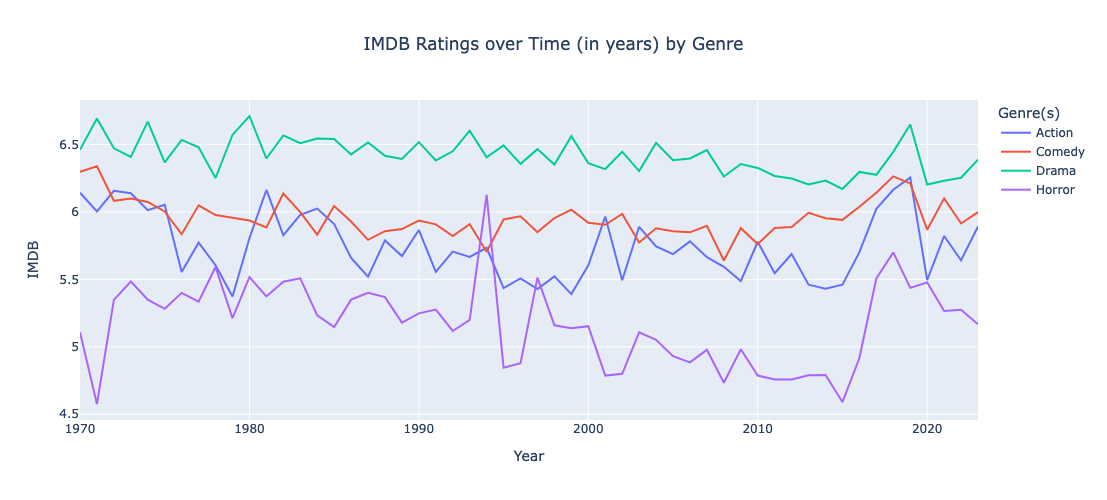

In [837]:
# Plot IMDB movie ratings by genre per year.

fig1 = px.line(
    df_groupby_genres2,
    x = 'Year',
    y = 'IMDB',
    color = 'Genre(s)',
    title='IMDB Ratings over Time (in years) by Genre',
    height = 500
)
fig1.update_layout(title_x = .5)
fig1.show()

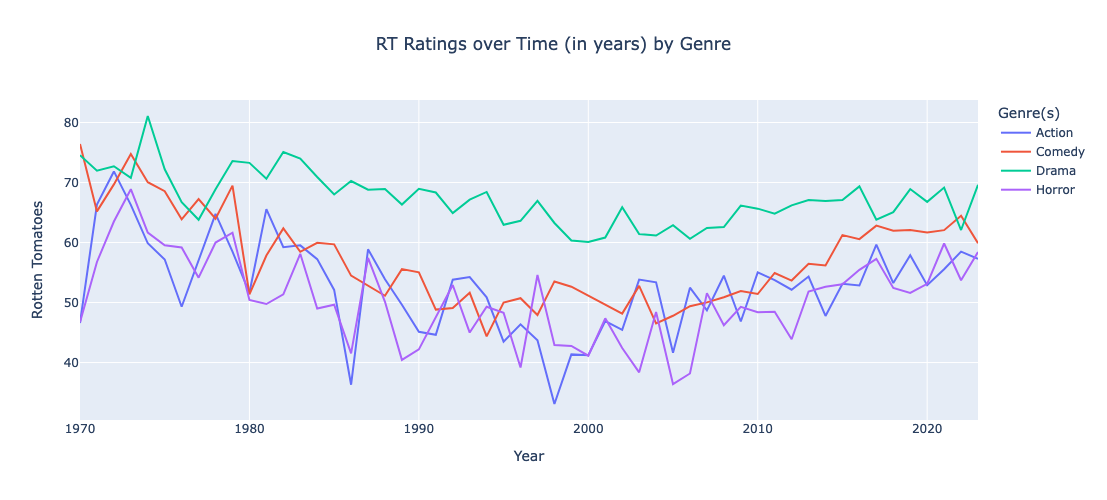

In [838]:
# Plot RT movie ratings by genre per year.
fig2 = px.line(
     df_groupby_genres_RT_2,
     x = 'Year',
     y = 'Rotten Tomatoes',
     color = 'Genre(s)',
     title='RT Ratings over Time (in years) by Genre',
     height = 500
)

fig2.update_layout(title_x = .5)
fig2.show()

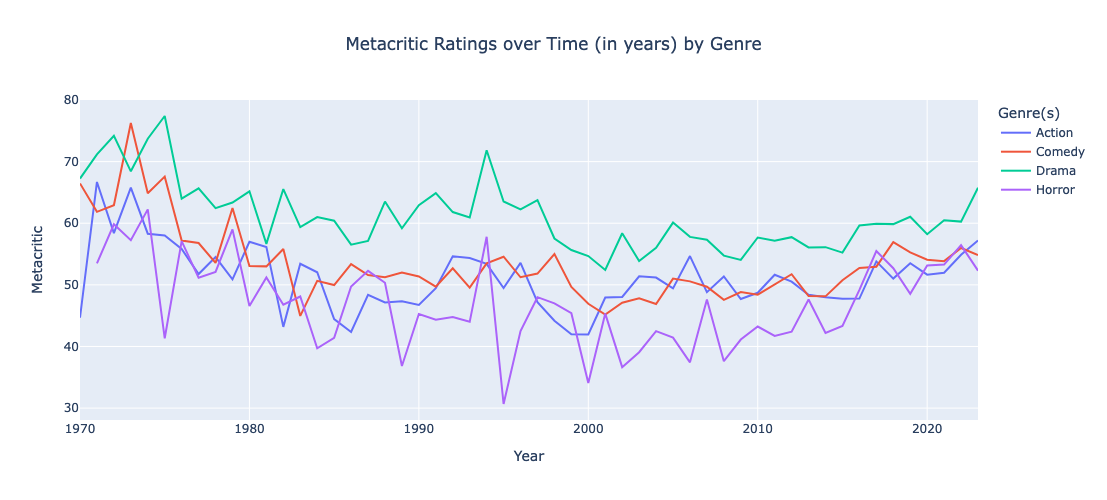

In [839]:
# Plot Metacritic movie ratings by genre per year.
fig3 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'Metacritic',
     color = 'Genre(s)',
     title='Metacritic Ratings over Time (in years) by Genre ',
     height = 500
)

fig3.update_layout(title_x = .5)
fig3.show()

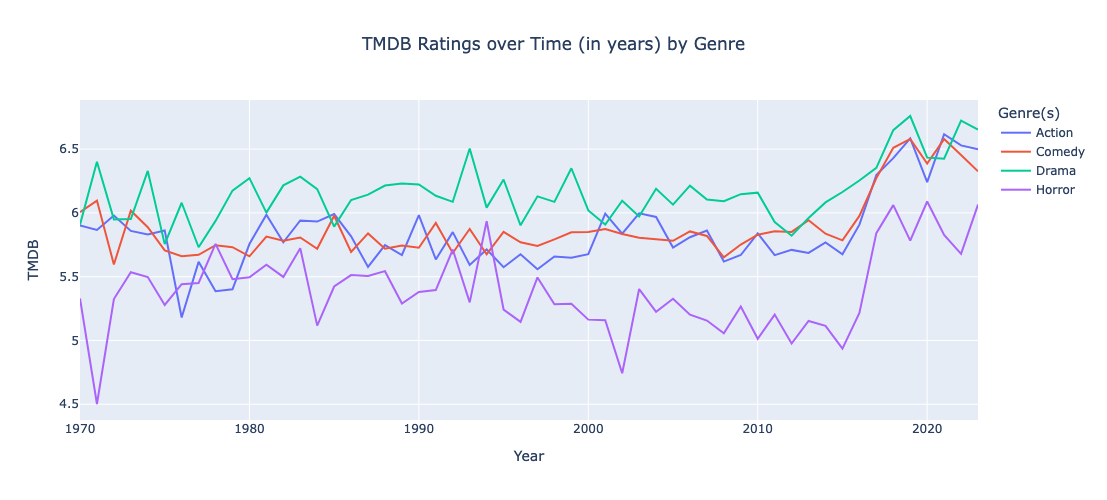

In [840]:
# Plot TMDB movie ratings by genre per year.
fig4 = px.line(
     df_groupby_genres2,
     x = 'Year',
     y = 'TMDB',
     color = 'Genre(s)',
     title='TMDB Ratings over Time (in years) by Genre',
     height = 500
)

fig4.update_layout(title_x = .5)
fig4.show()

# UPLOAD

### C. Total Gross Domestic Box Office Sales (GDBOS) By Year, Adjusted for Inflation

#### Step 1) Drop all movies that have NaN in GDBOS column.

In [844]:
df_GDBOS = df.dropna(subset=['Gross Domestic Box Office Sales ($)'])

print(f'A total of {df.shape[0]-df_GDBOS.shape[0]} movies were removed.')

A total of 10970 movies were removed.


#### Step 2) Create dictionary with top 10 GDBOS movies by year and sum GDBOS.

In [846]:
df_GDBOS_sorted = df_GDBOS.sort_values(by=['Year','Gross Domestic Box Office Sales ($)'],ascending=[True,False])

top_ten_dict = {}
for year in range(1972,2024,1):
    top_ten_dict[float(year)] = df_GDBOS_sorted[df_GDBOS_sorted['Year'] == year].head(10)['Gross Domestic Box Office Sales ($)'].sum()

#### Step 3) Group movies by year and sum the GDBOS for each movie in that year.

In [848]:
# Group movies by year and total GDBOS.
df_GDBOS_by_year = df_GDBOS.groupby('Year')['Gross Domestic Box Office Sales ($)'].sum().reset_index()
print(df_GDBOS_by_year.sample(1))

# Group movies by year and average GDBOS.
df_GDBOS_by_year_avg = df_GDBOS.groupby('Year')['Gross Domestic Box Office Sales ($)'].mean().reset_index()
print(df_GDBOS_by_year_avg.sample(1))

      Year  Gross Domestic Box Office Sales ($)
16  1986.0                         3.193605e+09
      Year  Gross Domestic Box Office Sales ($)
40  2010.0                         3.562728e+07


In [849]:
# Create new column listing total GDBOS for top 10 movies each year.
df_GDBOS_by_year.set_index('Year',inplace=True)
df_GDBOS_by_year['Gross Domestic Box Office Sales Top 10($)'] = pd.Series(top_ten_dict)
df_GDBOS_by_year['Gross Domestic Box Office Sales Top 10($)'] = df_GDBOS_by_year['Gross Domestic Box Office Sales Top 10($)'].astype(float)
df_GDBOS_by_year.reset_index(inplace=True)

# Show final result in DataFrame.
df_GDBOS_by_year.sample(1)

,Year,Gross Domestic Box Office Sales ($),Gross Domestic Box Office Sales Top 10($)
9,1979.0,1.872113e+09,825403388.0


#### Step 4)
- Create function to calculate inflation and convert USD in given a year to the USD in 2023.
- Apply function to datasets.
- Melt dataset in order to plot DataFrame in a stacked bar graph.

In [851]:
# Define function to convert the GDBOS for a year and calculate the USD value in year 2023.
ANNUAL_INFLATION_RATES = [3.0, 3.6, 8.3, 9.1, 6.5, 6.3, 7.4, 9.8, 12.4, 10.4, 7.4, 4.0, 5.0, 4.3, 4.0, 4.1, 4.4, 4.5, 5.0, 4.9, 3.7, 3.3, 2.8, 3.0, 2.7, 2.4, 2.3, 2.1, 2.4, 2.6, 2.4, 1.4, 1.8, 2.2, 2.5, 2.3, 2.3, 1.7, 1.0, 1.7, 2.1, 1.8, 1.7, 1.8, 2.2, 1.8, 2.1, 2.2, 1.7, 3.6, 6.2, 4.8]

FIRST_YEAR = 1972
LAST_YEAR = 2023

# Calculates USD in 2023 for total GDBOS.
def get_today_GDBOS(row):

  # Returns USD value in 2023 using the formula T = Pr
  # So, the GDBOS of 2021 would be GDBOS(from 2021)*(1+inflation_rate_2021)*(1+inflation_rate_2022)*(1+inflation_rate_2023).
  # coef = (1+inflation_rate_2021)*(1+inflation_rate_2022)*(1+inflation_rate_2023)
  release_year = row['Year']
  years_elapsed = LAST_YEAR - release_year
  release_year_GDBOS = row['Gross Domestic Box Office Sales ($)']

  # Function calculates coefficient to muliply with release_year_GDBOS
  def calc_coef(rates,i):
      if i != len(rates)-1:
          return ((rates[i]/100.0)+1)*calc_coef(rates,i=i+1)
      else: 
          return ((rates[i]/100.0)+1)
          
  start_index = int(release_year-FIRST_YEAR)
  inflation_rate_list = ANNUAL_INFLATION_RATES[start_index:]
  coef = calc_coef(inflation_rate_list,0)
  return release_year_GDBOS * coef

# Calculates USD in 2023 for top 10 GDBOS movies.
def get_today_GDBOS_top10(row):

  # Returns USD value in 2023 using the formula T = Pr
  # So, the GDBOS of 2021 would be GDBOS(from 2021)*(1+inflation_rate_2021)*(1+inflation_rate_2022)*(1+inflation_rate_2023).
  # coef = (1+inflation_rate_2021)*(1+inflation_rate_2022)*(1+inflation_rate_2023)
  release_year = row['Year']
  years_elapsed = LAST_YEAR - release_year
  release_year_GDBOS = row['Gross Domestic Box Office Sales Top 10($)']

  # Function calculates coefficient to muliply with release_year_GDBOS
  def calc_coef(rates,i):
      if i != len(rates)-1:
          return ((rates[i]/100.0)+1)*calc_coef(rates,i=i+1)
      else: 
          return ((rates[i]/100.0)+1)
          
  start_index = int(release_year-FIRST_YEAR)
  inflation_rate_list = ANNUAL_INFLATION_RATES[start_index:]
  coef = calc_coef(inflation_rate_list,0)
  return release_year_GDBOS * coef

# Apply function to calculate USD value (in 2023) for total GDBOS by year
df_GDBOS_by_year_with_inflation = df_GDBOS_by_year.copy()
df_GDBOS_by_year_with_inflation['Gross Domestic Box Office Sales ($)'] = df_GDBOS_by_year.apply(get_today_GDBOS,axis=1)
df_GDBOS_by_year_with_inflation.rename(columns={'Gross Domestic Box Office Sales ($)': 'Total GDBOS ($ in 2023)'}, inplace=True)
#df_GDBOS_by_year_with_inflation.sample(5)

# Apply function to calculate USD value (in 2023) for top 10 GDBOS by year
df_GDBOS_by_year_with_inflation['Gross Domestic Box Office Sales Top 10($)'] = df_GDBOS_by_year_with_inflation.apply(get_today_GDBOS_top10,axis=1)
df_GDBOS_by_year_with_inflation.rename(columns={'Gross Domestic Box Office Sales Top 10($)': 'Total GDBOS Top 10 ($ in 2023)'}, inplace=True)
#df_GDBOS_by_year_with_inflation.reindex(columns=['Year','Total GDBOS Top 10 ($ in 2023)','Total GDBOS ($ in 2023)'])
df_GDBOS_by_year_with_inflation.sample(5)

# Melt the df_GDBOS_by_year_with_inflation DataFrame to allow a stacked bar graph and convert values to billions ($) and round to (2) decimals.
df_melted = df_GDBOS_by_year_with_inflation.melt(id_vars='Year', var_name = 'GDBOS')
df_melted['value'] = df_melted['value'].apply(lambda value: round(value/1000000000,1))

df_melted.sample(5)

,Year,GDBOS,value
11,1981.0,Total GDBOS ($ in 2023),8.0
54,1970.0,Total GDBOS Top 10 ($ in 2023),NaN
44,2014.0,Total GDBOS ($ in 2023),14.3
10,1980.0,Total GDBOS ($ in 2023),11.4
58,1974.0,Total GDBOS Top 10 ($ in 2023),4.4


In [852]:
# Calculate average GDBOS by year, adjusted for inflation through year 2023.

df_GDBOS_by_year_avg['Gross Domestic Box Office Sales ($)'] = df_GDBOS_by_year_avg.apply(get_today_GDBOS, axis=1)
df_GDBOS_by_year_avg['Gross Domestic Box Office Sales ($)'] = df_GDBOS_by_year_avg['Gross Domestic Box Office Sales ($)'].apply(lambda sales: round(sales/1000000,1))
df_GDBOS_by_year_avg.rename(columns={'Gross Domestic Box Office Sales ($)': 'Avg GDBOS ($ in 2023)'}, inplace=True)

#### Step 5) Plot bar graph displaying total GDBOS by year, adjusted for inflation through year 2023.

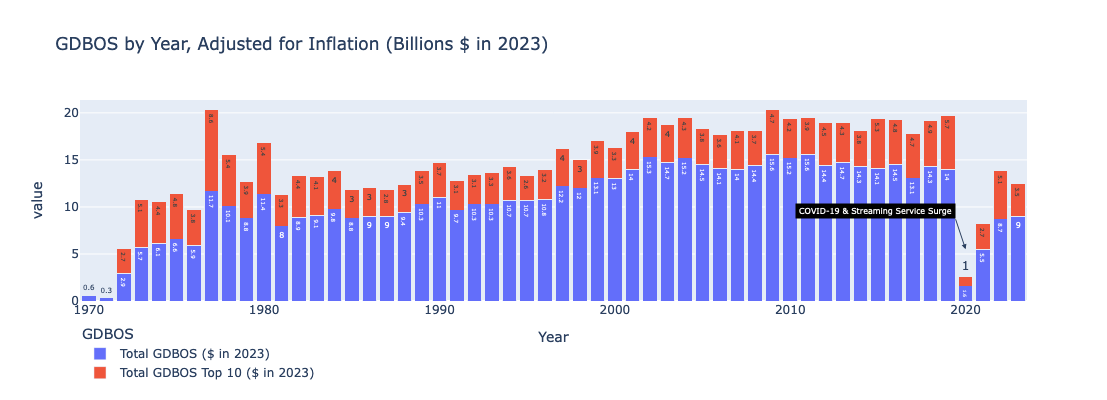

In [854]:
# Create stacked bar graph displaying the total GDBOS by year and GDBOS for top 10 movies by year, adjusted for inflation through year 2023.
fig = px.bar(
    df_melted,
    x = 'Year',
    y = 'value',
    color='GDBOS',
    title = 'GDBOS by Year, Adjusted for Inflation (Billions $ in 2023)',
    barmode='stack',
    text='value'
)

fig.update_traces(textfont=dict(size=12))

fig.update_layout(
    width = 1150,
    height=400,
    legend=dict(
        x=0,  
        y=-.1,  
        xanchor='left',  
        yanchor='top'    
    )
)
fig.add_annotation(
    x=2020,
    y=5.5,
    text="COVID-19 & Streaming Service Surge",
    showarrow=True,
    arrowhead=2,
    xanchor='right',
    yanchor='bottom',
    font=dict(size=8, color="white"),
    bgcolor="black"
)
fig.show()

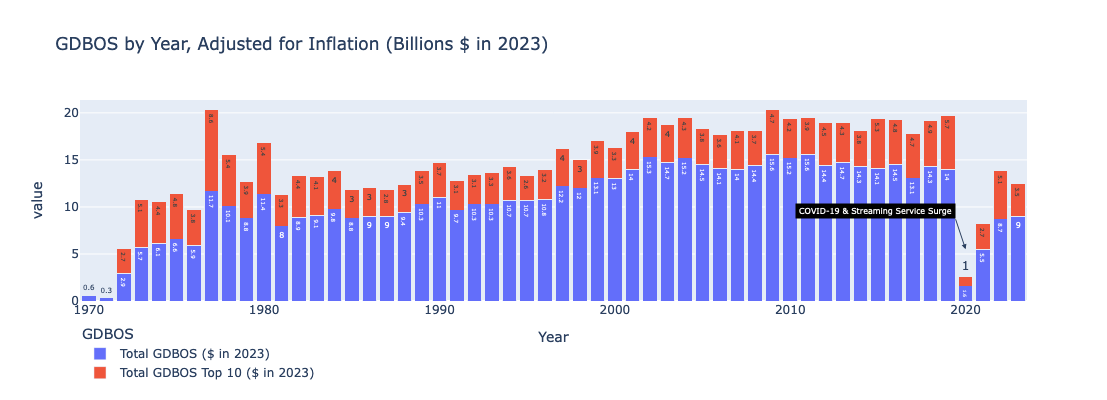

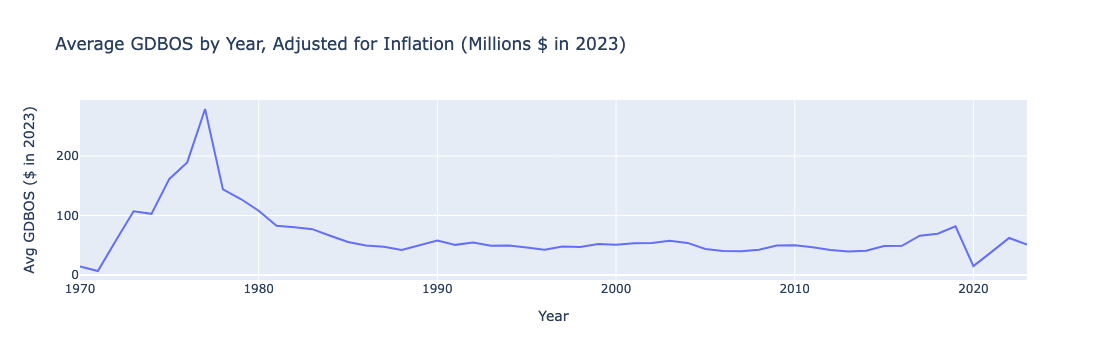

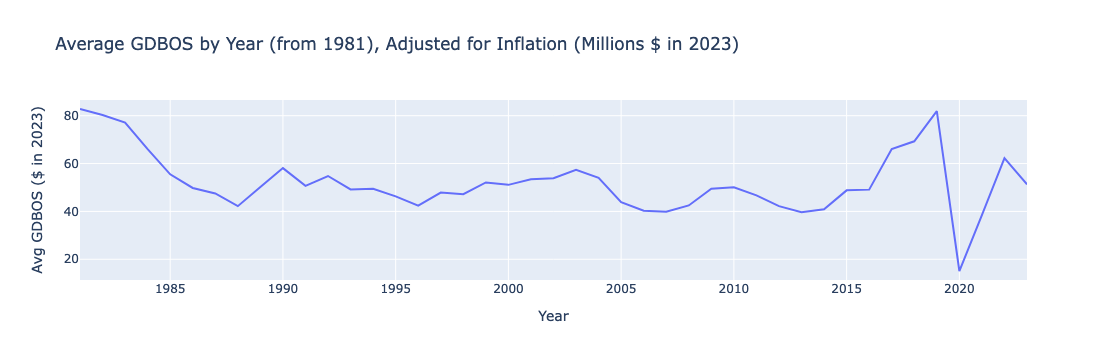

In [855]:
#### Step 6) Plot line graph displaying average GDBOS by year, adjusted for inflation through year 2023.
fig1 = px.line(
    df_GDBOS_by_year_avg,
    x = 'Year',
    y = 'Avg GDBOS ($ in 2023)',
    title = 'Average GDBOS by Year, Adjusted for Inflation (Millions $ in 2023)',
)
fig.show()

df_GDBOS_by_year_avg_from_1981 = df_GDBOS_by_year_avg[df_GDBOS_by_year_avg['Year'] >= 1981]
fig2 = px.line(
    df_GDBOS_by_year_avg_from_1981,
    x = 'Year',
    y = 'Avg GDBOS ($ in 2023)',
    title = 'Average GDBOS by Year (from 1981), Adjusted for Inflation (Millions $ in 2023)',
)
fig1.show()
fig2.show()


In [856]:
#Start - Joel Work
#Calculating  Medians, standard deviations, maxes and graphing them

#Estalish the year range
years = range(1977,2015)
median_IMDb = df['IMDB'].median()
std_IMDB = df['IMDB'].std()


df_yearly = pd.DataFrame(years, columns = ['Year'])
imdb_arr, rt_arr, mc_arr, tmdb_arr = [], [], [], []
imdb_med, rt_med, mc_med, tmdb_med = [], [], [], []
imdb_std, rt_std, mc_std, tmdb_std = [], [], [], []

#RT was a string, converting it to float in place
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])
print(df['Rotten Tomatoes'].head(10))
for i in years:
    imdb_arr.append(df[df['Year'] == i]['IMDB'].max())
    imdb_med.append(df[df['Year'] == i]['IMDB'].median())
    imdb_std.append(df[df['Year'] == i]['IMDB'].std())


    rt_arr.append(df[df['Year'] == i]['Rotten Tomatoes'].max()/10)
    rt_med.append(df[df['Year'] == i]['Rotten Tomatoes'].median()/10)
    rt_std.append(df[df['Year'] == i]['Rotten Tomatoes'].std()/10)


    mc_arr.append(df[df['Year'] == i]['Metacritic'].max()/10)
    mc_med.append(df[df['Year'] == i]['Metacritic'].median()/10)
    mc_std.append(df[df['Year'] == i]['Metacritic'].std()/10)


    tmdb_arr.append(df[df['Year'] == i]['TMDB'].max())
    tmdb_med.append(df[df['Year'] == i]['TMDB'].median())
    tmdb_std.append(df[df['Year'] == i]['TMDB'].std())

data_max = {'Year':years, 'IMDB':imdb_arr, 'Metacritic': mc_arr, 'TMDB': tmdb_arr, 'Rotten Tomatoes': rt_arr}


print(median_IMDb)
print(median_IMDb + 3* std_IMDB)
df_max = pd.DataFrame(data_max)

0     84.0
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
11     NaN
13     NaN
14    62.0
Name: Rotten Tomatoes, dtype: float64
6.2
9.8099487379446


In [857]:
#What do the 3.0 Z-scores look like? (3 standard deviations out)
print(np.array(imdb_med) + 3*np.array(imdb_std))
print(np.array(rt_med) + 3*np.array(rt_std))
print(np.array(mc_med) + 3*np.array(mc_std))
print(np.array(tmdb_med) + 3*np.array(tmdb_std))

[ 9.9793538   9.79686928  9.86310025  9.49164829  9.67370972  9.41945656
  9.77095124  9.52010021  9.54661143  9.10784516  9.70324203  9.18210074
  9.4694147   9.27395954  9.1477878   9.53424119  9.61319865  9.48597011
  9.88180339  9.49111724  9.4684631   9.64105958  9.89467376  9.80404539
  9.6143712   9.81528496 10.03983201 10.03507568 10.09462693 10.10864823
 10.14725336 10.25663356  9.99646197 10.12941376 10.06571856 10.13993106
 10.11953951 10.06449577]
[14.11724885 14.26608003 16.10148121 14.27302731 14.65362531 15.29661172
 15.48060105 15.34478127 14.39226786 13.89403866 14.11007168 13.70351366
 13.75372866 14.5337328  13.29866893 13.92072016 14.00656667 13.1649297
 13.26164953 13.53875061 13.06044862 13.02614169 13.34236634 13.279916
 13.07196197 13.92685999 13.12463293 13.52924784 13.59995145 13.29264735
 14.56479053 13.99275294 13.34568761 14.05636754 14.88580627 14.66112617
 14.24569125 14.7425561 ]
[11.22187755 11.20881993 11.48554499 11.45158482 10.46913311 11.44002211
 1

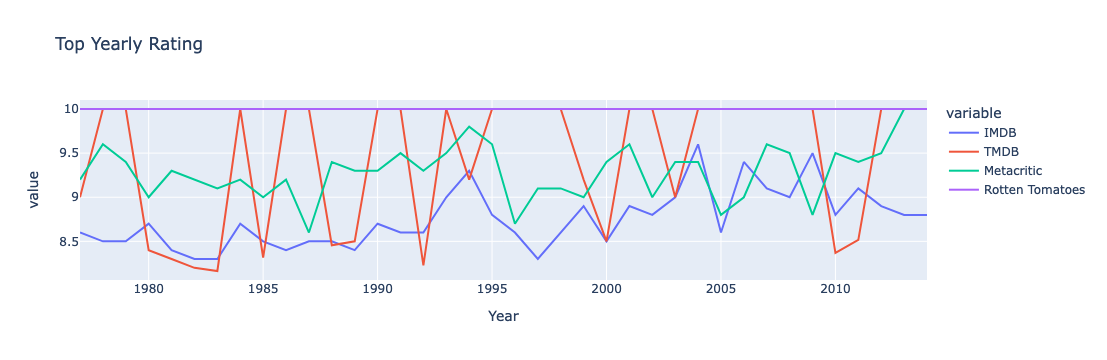

In [858]:
fig5 = px.line(
    df_max.reset_index(),
    x = 'Year',
    y = ['IMDB', 'TMDB', 'Metacritic', 'Rotten Tomatoes'],
    title='Top Yearly Rating'
)
fig5.show()

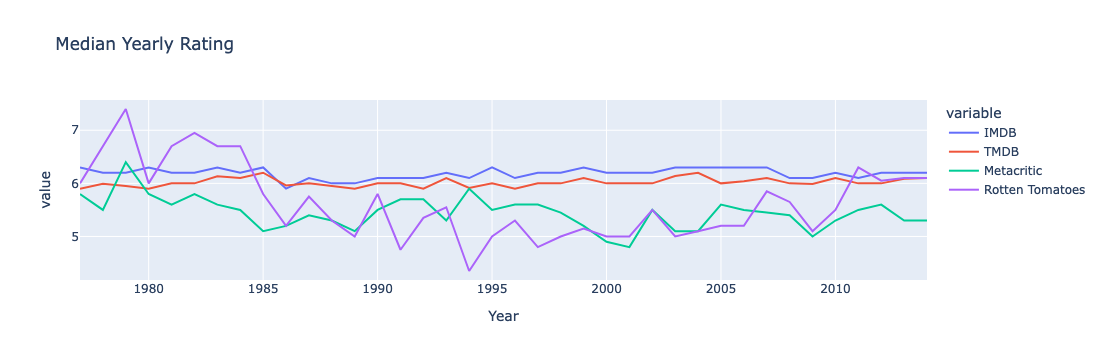

In [859]:
data_med = {'Year':years, 'IMDB':imdb_med, 'Metacritic': mc_med, 'TMDB': tmdb_med, 'Rotten Tomatoes': rt_med}

df_med = pd.DataFrame(data_med)

fig6 = px.line(
    df_med.reset_index(),
    x = 'Year',
    y = ['IMDB', 'TMDB', 'Metacritic', 'Rotten Tomatoes'],
    title='Median Yearly Rating'
)
fig6.show()

In [860]:
fig = px.bar(
    df,
    x = 'Year',
    y = 'Total GDBOS ($ in 2023)',
    title = 'Count of Scores'
)

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Title', 'Year', 'Genre(s)', 'IMDB', 'Rotten Tomatoes', 'Metacritic', 'TMDB', '# of IMDB Votes', '# of Awards', 'Gross Domestic Box Office Sales ($)', 'Media', 'Directors', 'Origin', 'Rotten_tom', 'IMDB_votes', 'Domestic?', 'Year_int', 'filmyear'] but received: Total GDBOS ($ in 2023)

In [ ]:
df.head()

In [ ]:
df_count_imdb = []
df_count_imdb =df['IMDB'].copy().value_counts()

In [ ]:
df_count_imdb.sort_index().plot()
plt.show()

In [ ]:
df_count_tmdb = []
df_count_tmdb =df['TMDB'].copy().value_counts()
df_count_tmdb.sort_index().plot()
plt.show()

In [ ]:
#End - Joel work

Brian: Ratings by Academy awards status

In [ ]:
tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('IMDB').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('IMDB').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('IMDB').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('IMDB').mean()
tab5 = df_final.groupby('Year').aggregate('IMDB').mean()

tab_IMDB = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_IMDB.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('TMDB').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('TMDB').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('TMDB').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('TMDB').mean()
tab5 = df_final.groupby('Year').aggregate('TMDB').mean()

tab_TMDB = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_TMDB.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('Rotten_tom').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('Rotten_tom').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('Rotten_tom').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('Rotten_tom').mean()
tab5 = df_final.groupby('Year').aggregate('Rotten_tom').mean()

tab_RT = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_RT.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

tab1 = df_final[df_final.nominations>0].groupby('Year').aggregate('Metacritic').mean()
tab2 = df_final[df_final.wins>0].groupby('Year').aggregate('Metacritic').mean()
tab3 = df_final[df_final.big5nom>0].groupby('Year').aggregate('Metacritic').mean()
tab4 = df_final[df_final.big5win>0].groupby('Year').aggregate('Metacritic').mean()
tab5 = df_final.groupby('Year').aggregate('Metacritic').mean()

tab_Meta = pd.concat([tab5, tab1, tab2, tab3, tab4], axis=1)
tab_Meta.columns = ['All Movies', 'Oscar Nomination', 'Oscar Win', 'Big 5 Nomination', 'Big 5 Win']

In [ ]:
# Create plot of different rating systems TMDB, IMDB, Rotten Tomatoes, and Metacritic
# Also inserted sum of missing values into each plot

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
tf = 18
fig.suptitle('Rating by Year and Oscar Status', fontsize=24)


axs[0, 0].plot(tab_TMDB)
axs[0, 0].set_title('TMDB', fontsize=tf)
#axs[0, 0].set_xticks(np.arange(0, 11, 1))
#axs[0, 0].set_xticklabels(np.arange(0, 11, 1), fontsize=12)
axs[0, 0].set_yticks(np.arange(5, 11, 1))
axs[0, 0].set_yticklabels(np.arange(5, 11, 1), fontsize=12)
axs[0, 0].set_xlabel('Year', fontsize=12)

axs[0, 1].plot(tab_IMDB)
axs[0, 1].set_title('IMDB', fontsize=tf)
axs[0, 1].set_yticks(np.arange(5, 11, 1))
axs[0, 1].set_yticklabels(np.arange(5, 11, 1), fontsize=12)
axs[0, 1].set_xlabel('Year', fontsize=12)

axs[1, 0].plot(tab_RT)
axs[1, 0].set_title('Rotten Tomatoes', fontsize=tf)
axs[1, 0].set_yticks(np.arange(50, 101, 10))
axs[1, 0].set_yticklabels(np.arange(50, 101, 10), fontsize=12)
axs[1, 0].set_xlabel('Year', fontsize=12)

axs[1, 1].plot(tab_Meta)
axs[1, 1].set_title('Metacritic', fontsize=tf)
axs[1, 1].set_yticks(np.arange(50, 101, 10))
axs[1, 1].set_yticklabels(np.arange(50, 101, 10), fontsize=12)
axs[1, 1].set_xlabel('Year', fontsize=12)

fig.legend(tab_TMDB, loc='lower center', ncol=5)
#plt.tight_layout()
plt.tight_layout(pad=1)
plt.subplots_adjust(bottom=0.1)
plt.show()

In [ ]:
### See if new dataset has all movies

In [ ]:
df_mov = pd.read_csv('movies_metadata.csv')
df_mov.head()

In [ ]:
df_mov.shape

In [ ]:
df_mov.dtypes

In [ ]:
df_mov.release_date2 = pd.to_datetime(df_mov.release_date, errors='coerce')
df_mov['Year'] = df_mov.release_date2.dt.year

In [ ]:
df_mov.release_date[df_mov.release_date2.isna() & df_mov.release_date.notna()]

In [ ]:
plt.hist(df_mov.Year, bins=np.arange(1965, 2030))

# TO DO:

- Add annotations showing why lack of data from 2014 on.
- Add meaningful annotations to all graphs.
- Finding which movies were removed from dataset may explain this.
- Also, keep in mind streaming services became very popular around 2018, and these movies do not have GDBOS.
- See notes in write up

# Conclusion

### Average Ratings by Year
- TMDB displayed significant bias towards modern movies versus movies released prior to 2015.

- Trends:
  - The best time periods include the following:
    - 1970’s
    - 1978-1984
    - 1993-1994
    - 2013-2019
  - The worst time periods include the following:
    - Late 1980’s
    - 1990’s
    - 2000’s

### Gross Domestic Box Office Sales (GDBOS)
#### Total GDBOS
- Obvious **upward trend** throughout data analyzed until 2020.

#### Top 10 GDBOS Movies by Year
- **Significant years**:
  - **1977 (Star Wars: Episode IV - A New Hope)**,
  - **1978 (Grease)**,
  - 1980 (Star Wars: Episode V - The Empire Strikes Back),
  - 2009 (Transformers: Revenge of the Fallen),
  - 2012 (The Avengers),
  - 2015 (Jurassic World),
  - 2019 (Avengers: Endgame)<br>
<br>
- **1990’s and 2000’s** experienced an overall **'dip'** with a few years as exceptions.
